<a href="https://colab.research.google.com/github/zzhu104/MAT-421/blob/main/Module%20C%3A%20Section%2019.1%2C%2019%2C2%2C%2019.3%2C%2019.4%2019.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 19. Root Finding**

**19.1 Root Finding Problem Statement**

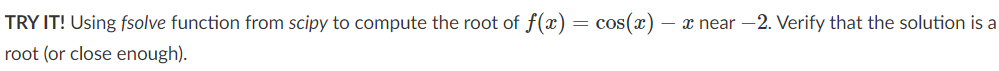

In [1]:
import numpy as np
from scipy import optimize

f = lambda x: np.cos(x) - x
r = optimize.fsolve(f, -2)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [0.73908513]
result= [0.]


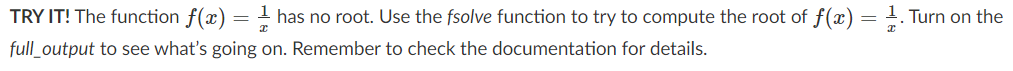

In [2]:
f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print("r =", r)

result = f(r)
print("result=", result)

print(mesg)

r = [-3.52047359e+83]
result= [-2.84052692e-84]
The number of calls to function has reached maxfev = 400.


We can see that, the value r we got is not a root, even though the f(r) is a very small number. Since we turned on the full_output, which have more information. A message will be returned if no solution is found, and we can see mesg details for the cause of failure - “The number of calls to function has reached maxfev = 400.”

19.2 Tolerance

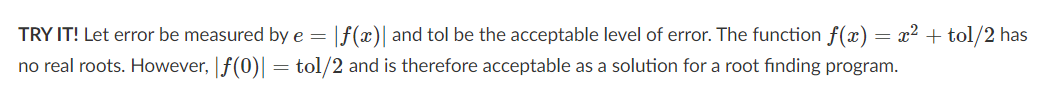

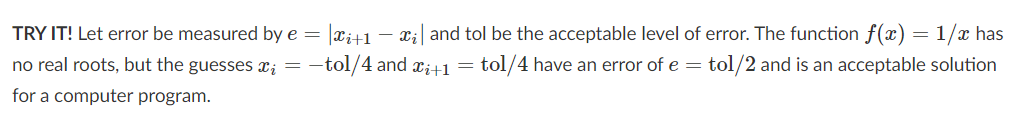

**19.3 Bisection Method**

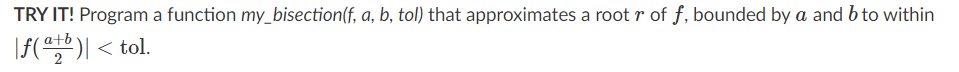

In [3]:
import numpy as np

def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint 
    # between a and b Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")
        
    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

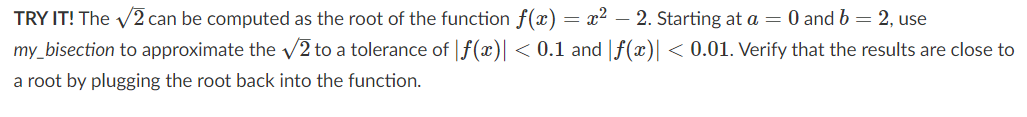

In [4]:
f = lambda x: x**2 - 2

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.4375
r01 = 1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375


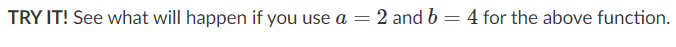

In [5]:
my_bisection(f, 2, 4, 0.01)

Exception: ignored

**19.4 Newton-Raphson Method**

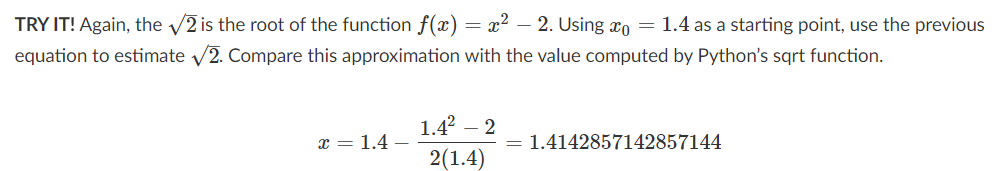

In [6]:
import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


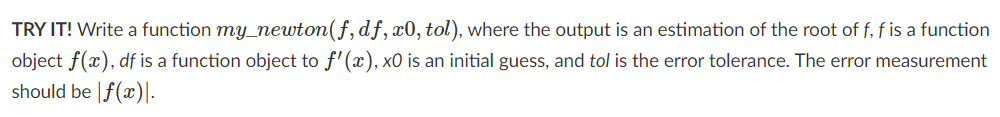

In [7]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

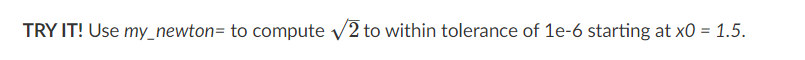

In [8]:
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))

estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


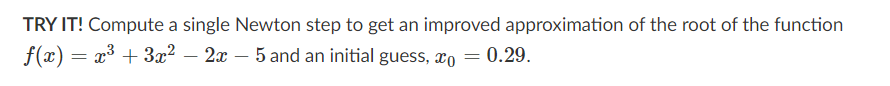

In [9]:
x0 = 0.29
x1 = x0-(x0**3+3*x0**2-2*x0-5)/(3*x0**2+6*x0-2)
print("x1 =", x1)

x1 = -688.4516883116648


**19.5 Root Finding in Python**

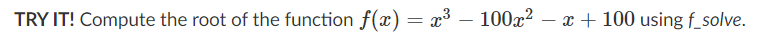

In [10]:
from scipy.optimize import fsolve

In [11]:
f = lambda x: x**3-100*x**2-x+100

fsolve(f, [2, 80])

array([  1., 100.])